# Telco Customer Churn Prediction
In this notebook we explored a telco data set with interactive analysis followed by various classification models and Artificial Neural Network(ANN). The notebook is divided into two main sections as follows;

1. Exploratory Data Analysis
2. Classification Models and ANN

By finding what factors are influencing the churn in the organisation we can improve customer retention.

**Note:** Dataset is taken from IBM Watson Analytics Blog

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('./data/Telco-Customer-Churn.csv')

In [3]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
del dataset['customerID']
dataset['Churn'].replace(['No','Yes'],['0','1'], inplace = True)
dataset['TotalCharges'].replace(' ', np.nan, inplace=True)
dataset = dataset.dropna(axis=0, subset=['TotalCharges'], how = 'all')

## Exploratory Data Analysis

In [5]:
dataset[['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


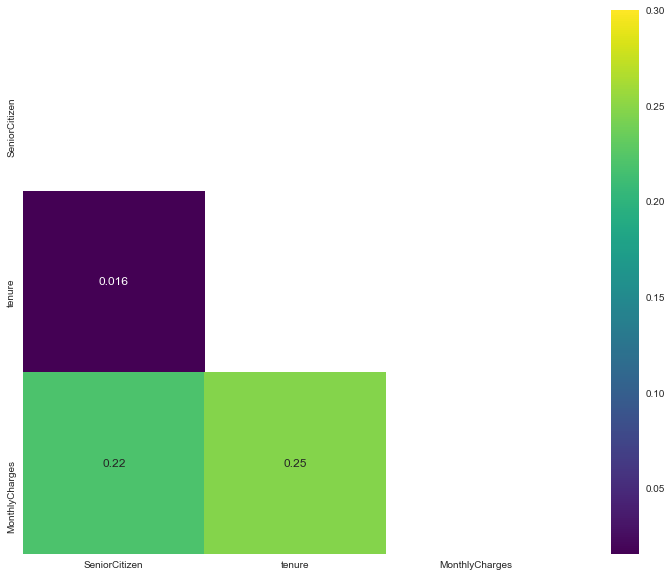

In [6]:
sns.set(font_scale=1)
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(16,10))
    ax = sns.heatmap(dataset.corr(), cmap='viridis', mask=mask, vmax=.3, square=True, annot=True)

####  Both in case of senior citizens and in general, we can see that if monthly charges are higher the tenure is lower.

In [7]:
Q= pd.DataFrame(dataset[(dataset.SeniorCitizen == 1) & (dataset.Churn == '1')])
Q[['tenure','MonthlyCharges','Churn']].describe()

,tenure,MonthlyCharges
count,476.000000,476.000000
mean,21.033613,80.713445
std,19.791410,21.007886
min,1.000000,19.450000
25%,3.000000,73.625000
50%,15.000000,84.825000
75%,35.000000,95.712500
max,72.000000,117.450000


In [8]:
S= pd.DataFrame(dataset[(dataset.Churn == '1' )])
S[['tenure','MonthlyCharges','Churn']].describe()

,tenure,MonthlyCharges
count,1869.000000,1869.000000
mean,17.979133,74.441332
std,19.531123,24.666053
min,1.000000,18.850000
25%,2.000000,56.150000
50%,10.000000,79.650000
75%,29.000000,94.200000
max,72.000000,118.350000


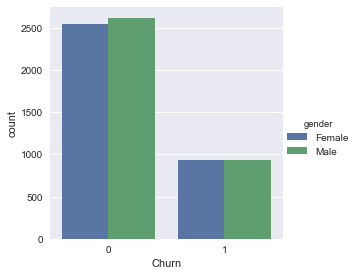

In [9]:
sns.factorplot('Churn', data = dataset, kind = 'count',hue = 'gender')

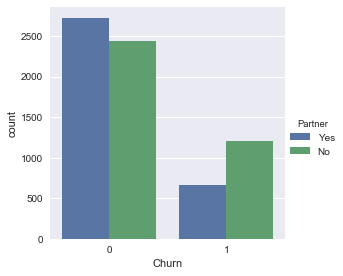

In [10]:
sns.factorplot('Churn', data = dataset, kind = 'count',hue = 'Partner')

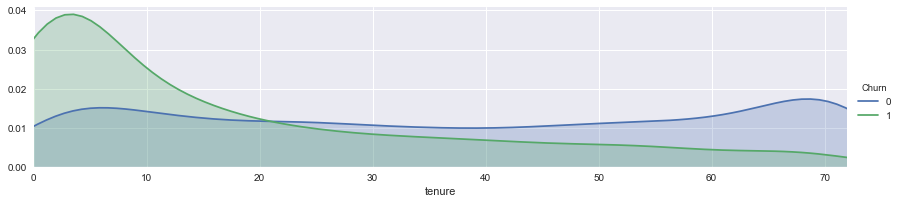

In [11]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(dataset, hue="Churn",aspect=4)
fig.map(sns.kdeplot,'tenure',shade= True)
max_tenure = dataset['tenure'].max()
fig.set(xlim=(0,max_tenure))
fig.add_legend()

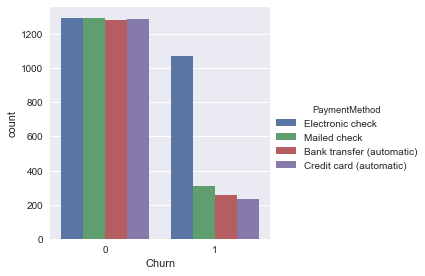

In [12]:
sns.factorplot('Churn', data = dataset, kind = 'count',hue = 'PaymentMethod')

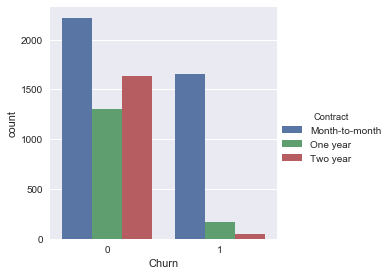

In [13]:
sns.factorplot('Churn', data = dataset, kind = 'count',hue = 'Contract')

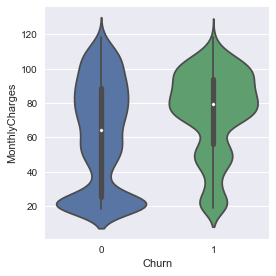

In [14]:
sns.factorplot('Churn','MonthlyCharges', data = dataset, kind = 'violin')

#### From above analysis we can see that the key parameters are *Tenure, Monthly Charges and Contract*.

## Classification Models and ANN
Used Naive Bayes and Random Forest Classifier. Finally, applied ANN by finding the principal components using PCA which explains the most variance in the dataset. 

Accuracy- 
          * Naive Bayes    ≈ 67%
          * Random Forest  ≈ 78%
          * ANN            ≈ 81%

In [15]:
# Encoding categorical data
X = dataset
X = pd.get_dummies(X,columns =['gender','Partner','Contract','Dependents','PhoneService','OnlineBackup','DeviceProtection','MultipleLines','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','InternetService','OnlineSecurity'], drop_first=True)
X = X.astype('float')
y = X.iloc[:, 4].values
del X['Churn']

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = bayes_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[616, 422],
       [ 49, 320]], dtype=int64)

In [19]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = random_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[945,  93],
       [203, 166]], dtype=int64)

In [20]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

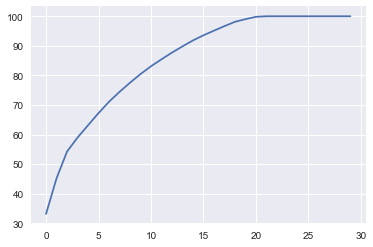

In [21]:
# Cumulative Variance explains
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [22]:
# Applying PCA with 18 components
from sklearn.decomposition import PCA
pca = PCA(n_components = 18)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

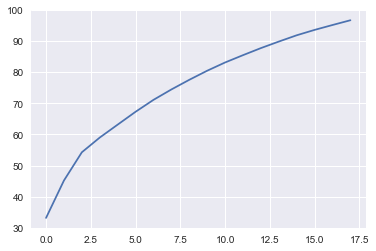

In [23]:
# Cumulative Variance explains
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Shubham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=10, kernel_initializer="uniform")`
  """
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
5625/5625 [==============================] - 1s 202us/step - loss: 0.5026 - acc: 0.7319
Epoch 2/100
5625/5625 [==============================] - 1s 150us/step - loss: 0.4409 - acc: 0.7730
Epoch 3/100
5625/5625 [==============================] - 1s 158us/step - loss: 0.4351 - acc: 0.7980
Epoch 4/100
5625/5625 [==============================] - 1s 170us/step - loss: 0.4327 - acc: 0.7989
Epoch 5/100
5625/5625 [==============================] - 1s 161us/step - loss: 0.4285 - acc: 0.8009 0s - loss: 0.4349 -
Epoch 6/100
5625/5625 [==============================] - 1s 169us/step - loss: 0.4271 - acc: 0.8034
Epoch 7/100
5625/5625 [==============================] - 1s 170us/step - loss: 0.4245 - acc: 0.8060
Epoch 8/100
5625/5625 [==============================] - 1s 161us/step - loss: 0.4232 - acc: 0.8023
Epoch 9/100
5625/5625 [==============================] - 1s 149us/step - loss: 0.4215 - acc: 0.8069
Epoch 10/100
5625/5625 [==============================] - 1s 159us/step - loss: 

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[934, 104],
       [179, 190]], dtype=int64)